# Welcome To My Analysis File of Amazon Co-purchasing Network

Note That This Is Only A Sub-part Of Whole Dataset

In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import count



# The extraction and preparation step of the nodes' CSV file has been done earlier, and its code is in the separate file.


In [2]:
df=pd.read_csv('/content/clean_amazon.csv')
df.head()

,FromNodeId,ToNodeId
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5


# PreparingTthe Product Meta Data CSV

In [3]:
import csv
 
input_file = 'amazon-meta.txt'
output_file = 'amazon-meta.csv'

with open(input_file, 'r', encoding='utf-8') as F:
    content=F.readlines()
content=[x.strip()for x in content]

file= open('Amazon_clean_meta.txt','w',encoding='utf-8')
all_row=['Id','title', 'group', 'categories', 'totalreviews','avgrating'] # Column names

for line in content:
    lines = line.split(':')

    if lines[0]=='Id':
        if (len(all_row)==6):
          for comp in all_row[0:5]:
            file.write(comp)
            file.write(',')

          file.write(all_row[5])
          file.write('\n')
          all_row=[]
          all_row.append(lines[1].strip())
    if lines[0]=='title':
      title=':'.join(lines[1:]).strip().replace(',',' ').replace('\n',' ').strip()
      all_row.append(title)
    if lines[0]=='group':
      all_row.append(lines[1].strip())
    if lines[0]=='categories':
      all_row.append(lines[1].strip())
    if lines[0]=='reviews' and lines[1].strip()=='total':
      all_row.append(lines[2].split(' ')[1])
      all_row.append(lines[4].strip())
file.close()
print(1)



1


In [4]:
new_df=pd.read_csv('Amazon_clean_meta.txt',sep=',') # Reading the cleaned file
new_df.head()

,Id,title,group,categories,totalreviews,avgrating
0,0,Patterns of Preaching: A Sermon Sampler,Book,2,2,5.0
1,2,Candlemas: Feast of Flames,Book,2,12,4.5
2,3,World War II Allied Fighter Planes Trading Cards,Book,1,1,5.0
3,4,Life Application Bible Commentary: 1 and 2 Tim...,Book,5,1,4.0
4,5,Prayers That Avail Much for Business: Executive,Book,2,0,0.0


In [5]:
new_df['Id'].iloc[0]=1 # Setting the initial id to 1 , earlier it was 0

<ipython-input-5-7362422a8e52>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Id'].iloc[0]=1 # Setting the initial id to 1 , earlier it was 0


In [6]:
new_df.to_csv('Amazon_clean_meta.csv') # Saving for future use

In [7]:
new_df.head() # Printing 1st 5 columns

,Id,title,group,categories,totalreviews,avgrating
0,1,Patterns of Preaching: A Sermon Sampler,Book,2,2,5.0
1,2,Candlemas: Feast of Flames,Book,2,12,4.5
2,3,World War II Allied Fighter Planes Trading Cards,Book,1,1,5.0
3,4,Life Application Bible Commentary: 1 and 2 Tim...,Book,5,1,4.0
4,5,Prayers That Avail Much for Business: Executive,Book,2,0,0.0


In [8]:
set(new_df['group']) # Checking all the different products available, Note that 3 Products have been deleted from the original dataset

{'Book', 'DVD', 'Music', 'Toy', 'Video'}

# Now Let's Attach The Group Attribute From Meta-Data To Nodes Id 

In [9]:
G=nx.from_pandas_edgelist(df,'FromNodeId','ToNodeId')  # Creating A Networkx Graph of node csv file

In [10]:
combined_values=dict(zip(new_df.Id,new_df.group)) # combining the id and group to 1 file


In [11]:
nx.set_node_attributes(G, combined_values, 'group') # Setting the attribute of the nodes 

In [12]:
G.number_of_nodes(), G.number_of_edges() # Checking the number of nodes and number of edges in the graph

(137260, 394188)

# Now That We Have Created The Graph, Lets Start The Visualising 

In [13]:
import matplotlib.pyplot as plt

In [14]:
Nodes_Group=list(nx.get_node_attributes(G,'group').values()) # Checking the individual count of each product category
valuecount=pd.value_counts(Nodes_Group)
valuecount




Book     8588
Music    2479
Video     581
DVD       461
Toy         2
dtype: int64

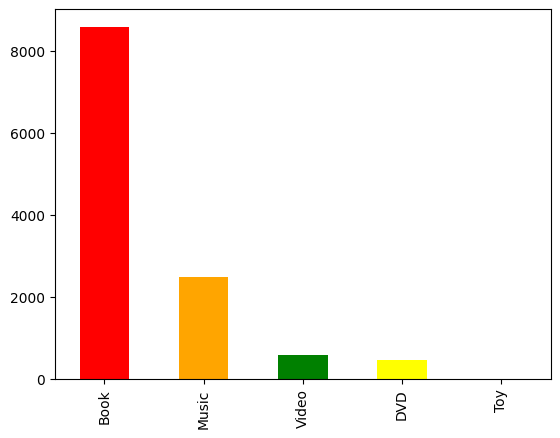

In [15]:
colors = ["red", "orange", "green", "yellow",'purple','blue']  
X= valuecount.plot.bar(color=colors) # Bar Graph 


# Now lets connect 2 products see how they relate to each other while purchasing

Since the book has maximum count so we will take book as 1 product 
and DVD( People might buy DVD based on the books or vice-versa) as another

In [19]:
dvd_nodes=set(new_df[new_df['group']=='DVD'].Id) # I have extracted the id of those nodes whose group is DVD


In [20]:
dvd_df=df[df.FromNodeId.isin(dvd_nodes) |df.ToNodeId.isin(dvd_nodes) ] # Making the dataframe of the DVD nodes

# Lets make new network for DVD dataframe

In [21]:
DVD_G=nx.from_pandas_edgelist(dvd_df,'FromNodeId','ToNodeId') # Making the network 

In [22]:
nx.set_node_attributes(DVD_G, combined_values, 'group') # Setting the attribute of the nodes 

In [30]:
DVD_G.number_of_edges(), DVD_G.number_of_nodes() # Checking the nodes and edges

(4375, 4225)

(array([198.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([   2. ,  185.9,  369.8,  553.7,  737.6,  921.5, 1105.4, 1289.3,
        1473.2, 1657.1, 1841. ]),
 <BarContainer object of 10 artists>)

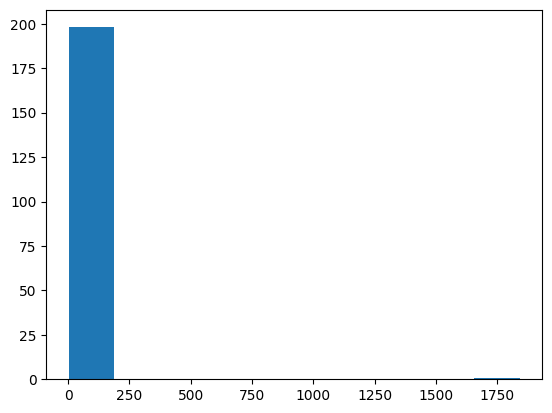

In [48]:

connected_components = list(nx.connected_components(DVD_G))
connected_component_subgraphs = [DVD_G.subgraph(component) for component in connected_components]
connected_component_lengths = [len(subgraph) for subgraph in connected_component_subgraphs]

plt.hist(connected_component_lengths)




# Now Let's Visualize the subgraph

In [59]:

connected_components = list(nx.connected_components(DVD_G))
subG = [DVD_G.subgraph(component) for component in connected_components if len(component) < 300]

len(subG)

198

In [60]:
L=[]                       # We have selected nodes from the subgraph and have appended them in list
max=0
pos=0
for i in range(0,198):
  N=len(subG[i])
  L.append(N)
  if  N>max:
    pos=i
    max=N


In [61]:
(subG[pos].number_of_nodes()) # Checking the number of nodes

59

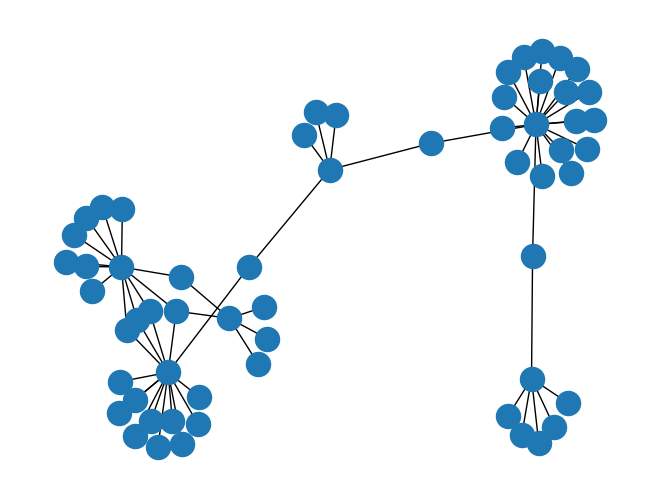

In [62]:
nx.draw(subG[pos])  #Plotting the subgraph

# Now Let's Color Code It 😀😀

A subgraph subG[pos] with nodes colored according to their group attribute. Each group have a distinct color, and a legend was added to show the mapping between colors and groups.

/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:433: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(
/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


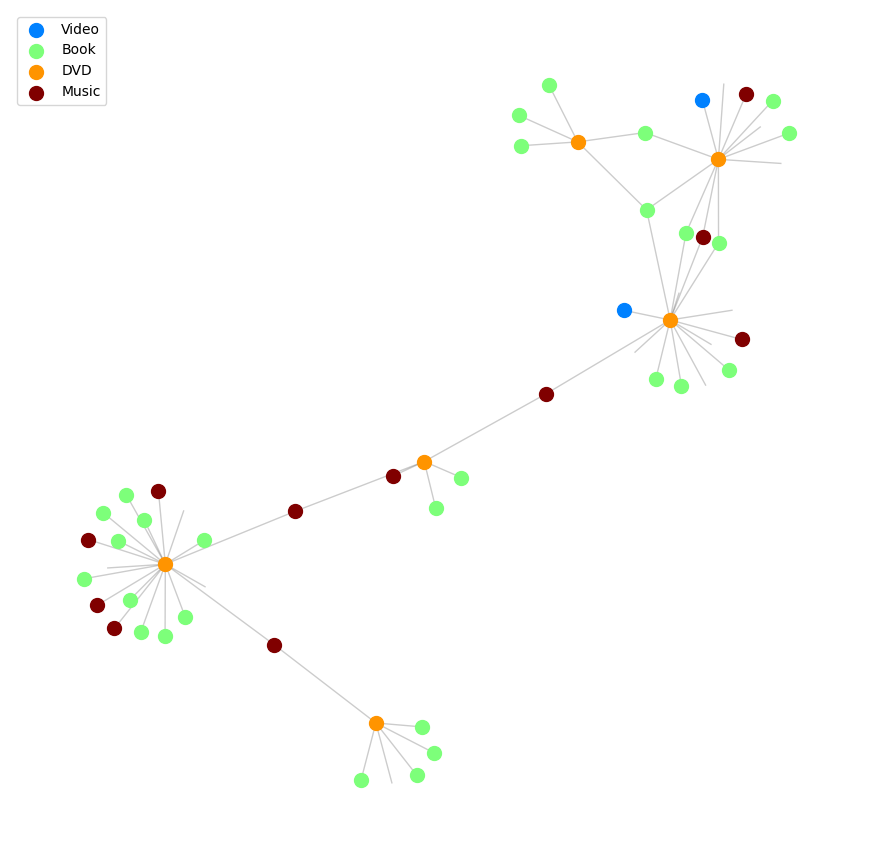

In [63]:
node_groups=list(nx.get_node_attributes(G,'group').values()) # Getting  Groups

groups=set(node_groups) # Making Set
node_group_dic=nx.get_node_attributes(subG[pos],'group')
color=[plt.cm.jet(x) for x in np.linspace(0,1,len(groups))]
poss=nx.spring_layout(subG[pos])

plt.figure(figsize=(11,11))
for i, groups in enumerate(groups):
  group_nodes=[node for node, value in node_group_dic.items() if value==groups]
  nx.draw_networkx_nodes(subG[pos],poss,nodelist=group_nodes,node_color=color[i],label=groups, node_size=100,cmap=plt.cm.jet)
nx.draw_networkx_edges(subG[pos],poss,alpha=0.2)
plt.legend()
plt.axis('off')
plt.show()